This program is designed to classify data based on genetic, environmental, and demographic features using machine learning algorithms. It loads datasets from CSV files, preprocesses the data, trains multiple classification models (Decision Tree, Random Forest, and Support Vector Machine), evaluates their performance, and visualizes the results.

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
genetic_data = pd.read_csv('genetic_data_train.csv')
environmental_data = pd.read_csv('EnvironmentalDataSet.csv')
demographic_data = pd.read_csv('world_population_data.csv')

In [ ]:
# Select only numeric columns from each DataFrame
genetic_data_numeric = genetic_data.select_dtypes(include=np.number)
environmental_data_numeric = environmental_data.select_dtypes(include=np.number)
demographic_data_numeric = demographic_data.select_dtypes(include=np.number)

min_rows = min(len(genetic_data_numeric), len(environmental_data_numeric), len(demographic_data_numeric))
genetic_data_numeric = genetic_data_numeric.iloc[:min_rows]
environmental_data_numeric = environmental_data_numeric.iloc[:min_rows]
demographic_data_numeric = demographic_data_numeric.iloc[:min_rows]


X = pd.concat([genetic_data_numeric, environmental_data_numeric, demographic_data_numeric], axis=1)

y = np.random.randint(0, 2, min_rows)  # Adjust y size to match the number of rows

df = pd.concat([X, pd.Series(y, name='target')], axis=1)  # Combine X and y into a single DataFrame
df = df.dropna()  # Drop rows with NaN in any column
df = df.fillna(df.mean())
      # Check if the DataFrame is empty after dropping NaNs

X = df.drop('target', axis=1)  # Separate X
y = df['target'].values



In [ ]:
print("Genetic Data Shape:", genetic_data_numeric.shape)
print("Environmental Data Shape:", environmental_data_numeric.shape)
print("Demographic Data Shape:", demographic_data_numeric.shape)
print("Combined Data Shape:", X.shape)
print("Target Shape:", y.shape)

Genetic Data Shape: (183, 10)
Environmental Data Shape: (183, 15)
Demographic Data Shape: (183, 12)
Combined Data Shape: (0, 37)
Target Shape: (0,)


In [ ]:
print("Number of NaN values in DataFrame:", df.isnull().sum().sum())

Number of NaN values in DataFrame: 0


In [ ]:
print("Data types of columns in genetic data:", genetic_data.dtypes)
print("Data types of columns in environmental data:", environmental_data.dtypes)
print("Data types of columns in demographic data:", demographic_data.dtypes)

Data types of columns in genetic data: PC1         float64
PC2         float64
PC3         float64
PC4         float64
PC5         float64
PC6         float64
PC7         float64
PC8         float64
PC9         float64
PC10        float64
Ancestry     object
dtype: object
Data types of columns in environmental data: datetime               object
excel_code            float64
day                     int64
time                  float64
field_soil_temp_c     float64
field_air_temp_c      float64
field_rh              float64
field_soil_wc         float64
forest_soil_temp_c    float64
forest_air_temp_c     float64
forest_rh             float64
forest_soil_wc        float64
pond_soil_temp_c      float64
pond_air_temp_c       float64
pond_rh               float64
pond_soil_wc          float64
dtype: object
Data types of columns in demographic data: rank                  int64
cca3                 object
country              object
continent            object
2023 population       int64
2022 

In [ ]:
# Step 2: Data Preprocessing
X, y = generate_synthetic_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Model Training
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)


Evaluation for Decision Tree:
              precision    recall  f1-score   support

           0       0.42      0.38      0.40       100
           1       0.43      0.47      0.45       100

    accuracy                           0.42       200
   macro avg       0.42      0.42      0.42       200
weighted avg       0.42      0.42      0.42       200



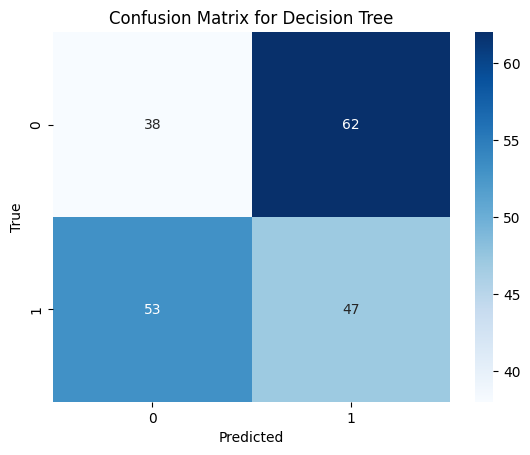

Evaluation for Random Forest:
              precision    recall  f1-score   support

           0       0.49      0.42      0.45       100
           1       0.50      0.57      0.53       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



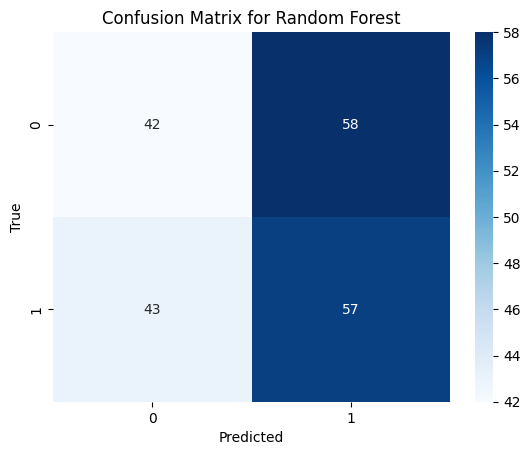

Evaluation for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.58      0.40      0.47       100
           1       0.54      0.71      0.61       100

    accuracy                           0.56       200
   macro avg       0.56      0.55      0.54       200
weighted avg       0.56      0.56      0.54       200



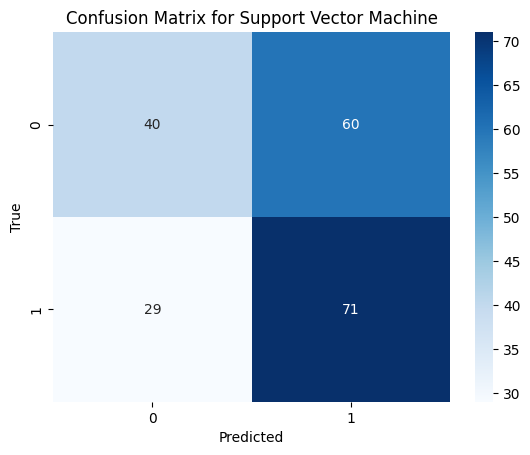

In [ ]:
# Step 4: Evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

evaluate_model(y_test, dt_predictions, "Decision Tree")
evaluate_model(y_test, rf_predictions, "Random Forest")
evaluate_model(y_test, svm_predictions, "Support Vector Machine")

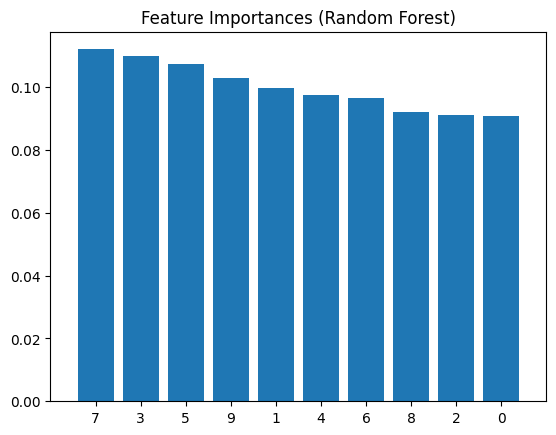

In [ ]:
# Step 5: Visualization of Results
# Feature Importance for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotting feature importances
plt.figure()
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()